In [1]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load dataset
diabetes = load_diabetes(as_frame=True)
df = diabetes.frame

# View first few rows
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


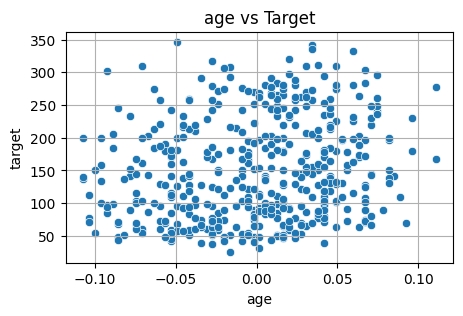

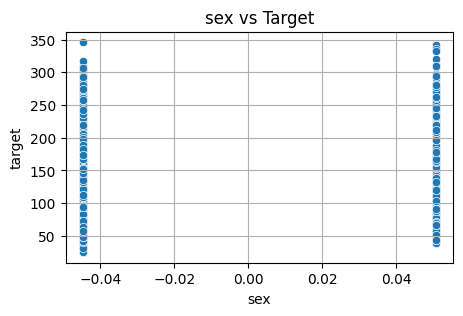

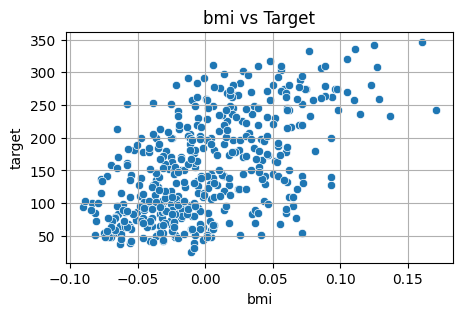

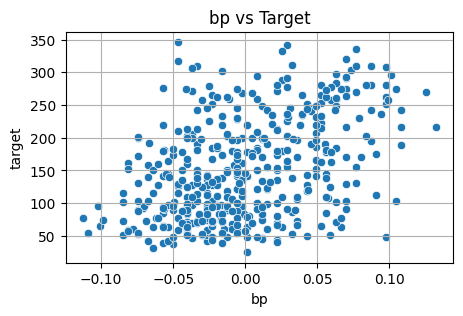

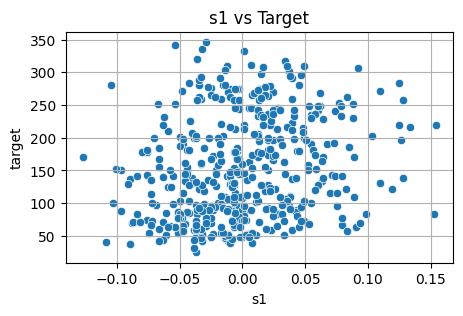

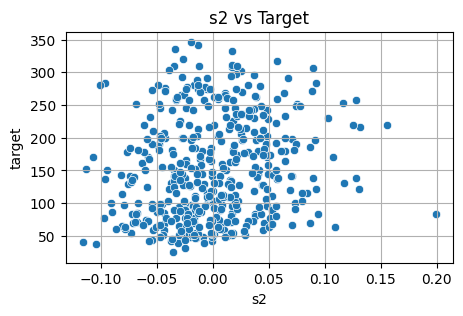

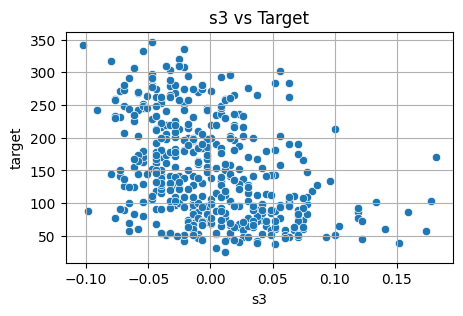

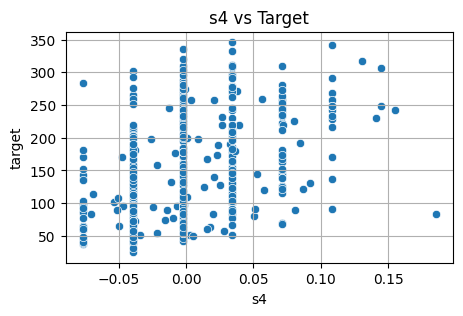

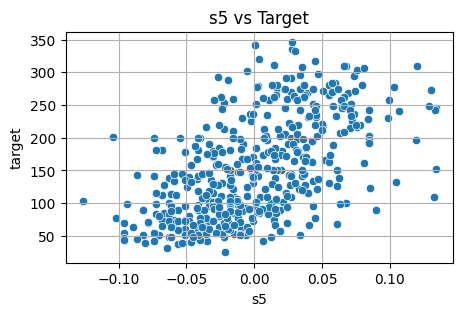

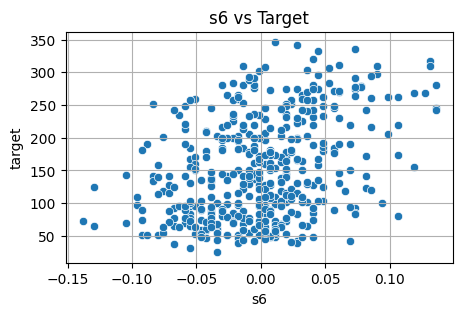

In [3]:
# Scatter plots for each feature vs target
for col in df.columns[:-1]:
    plt.figure(figsize=(5,3))
    sns.scatterplot(x=df[col], y=df['target'])
    plt.title(f"{col} vs Target")
    plt.grid(True)
    plt.show()


##### To apply linear regression , there should be a linear relation between the dependent and independent variable.

Train-Test Split

In [4]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train Linear Regression Model

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

# View coefficients
print("Intercept:", model.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")


Intercept: 151.34560453985995
Coefficients:
age: 37.9040
sex: -241.9644
bmi: 542.4288
bp: 347.7038
s1: -931.4888
s2: 518.0623
s3: 163.4200
s4: 275.3179
s5: 736.1989
s6: 48.6707


After calling fit(), the linear regression model will be trained using the provided training data, and it will learn the relationship between the features and the target values. The model will adjust its parameters (coefficients) to minimize the difference between the predicted values and the actual target values.

Evaluate the Model

In [14]:
y_pred = model.predict(X_test)

# Metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 2900.1936284934814
Root Mean Squared Error: 53.85344583676593
R² Score: 0.4526027629719195


##### Lower values of MSE indicate better model performance, as they imply that the model's predictions are closer to the actual values on average.


##### Higher R-squared values indicate better fit of the model to the data. A score of 0.9307 suggests that the linear regression model fits the data very well

Plot Actual vs Predicted

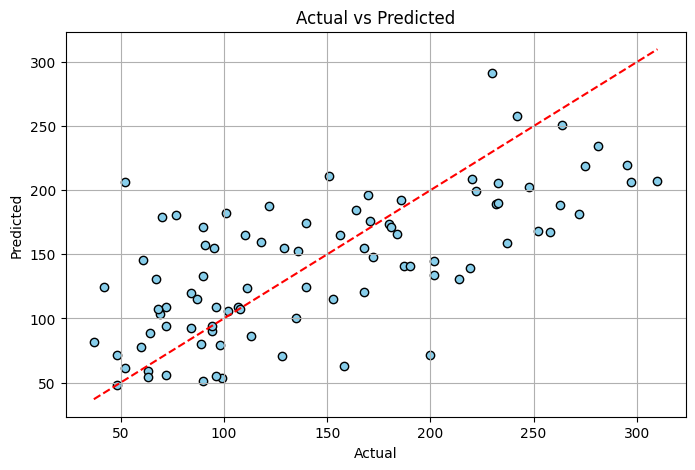

In [7]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, edgecolors='k', color='skyblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()


# Single Feature Regression (BMI vs Target)

In [8]:
# Check correlation with target
df.corr()['target'].sort_values(ascending=False)


,target
target,1.000000
bmi,0.586450
s5,0.565883
bp,0.441482
s4,0.430453
s6,0.382483
s1,0.212022
age,0.187889
s2,0.174054
sex,0.043062


In [9]:
X_bmi = df[['bmi']]  # Single feature as DataFrame
y = df['target']


In [10]:
X_train_bmi, X_test_bmi, y_train_bmi, y_test_bmi = train_test_split(X_bmi, y, test_size=0.2, random_state=42)


In [11]:
model_bmi = LinearRegression()
model_bmi.fit(X_train_bmi, y_train_bmi)

# Coefficient and intercept
print("Intercept:", model_bmi.intercept_)
print("Slope:", model_bmi.coef_[0])


Intercept: 152.00335421448167
Slope: 998.5776891375598


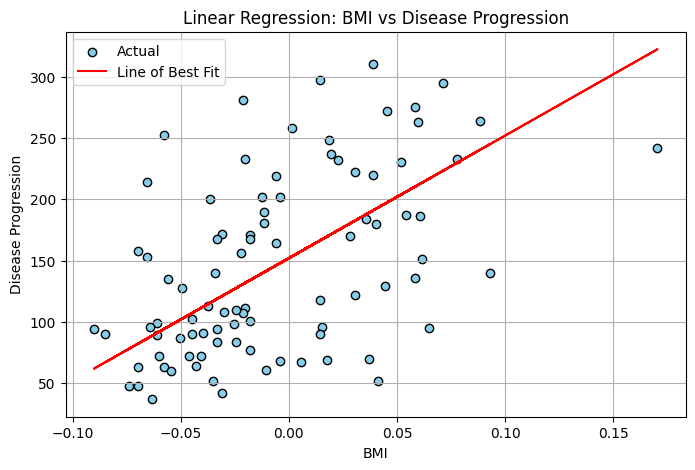

In [12]:
# Plot line on top of scatter
plt.figure(figsize=(8,5))
plt.scatter(X_test_bmi, y_test_bmi, color='skyblue', edgecolor='k', label="Actual")

# Predicted line
y_line = model_bmi.predict(X_test_bmi)
plt.plot(X_test_bmi, y_line, color='red', label="Line of Best Fit")

plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.title("Linear Regression: BMI vs Disease Progression")
plt.legend()
plt.grid(True)
plt.show()


In [15]:
y_pred_bmi = model_bmi.predict(X_test_bmi)

print("MSE:", mean_squared_error(y_test_bmi, y_pred_bmi))
print("RMSE:", np.sqrt(mean_squared_error(y_test_bmi, y_pred_bmi)))
print("R² Score:", r2_score(y_test_bmi, y_pred_bmi))


MSE: 4061.8259284949268
RMSE: 63.73245584860925
R² Score: 0.23335039815872138


##### A Root Mean Squared Error (RMSE) value of 0.63.7 means that, on average, the difference between the actual diabetic value and the predicted diabetic value is approximately 63.7 units